<a href="https://colab.research.google.com/github/AstridSerruto/Projects/blob/master/Web%20Crawling/Web_Scraping_Data_Science_Books.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Scraping 100+ data science books

I will be scraping the article “100+ Free Data Science Books” from the website learndatasci.com, which contains many useful resources for learning data science.

I’ll be using the Beautiful Soup library, a popular library for web scraping. And the data science libraries to transform and visualize the data and gain insights from it.

The goal is to decide which book to read from the huge list of 100 books based on overall rating and total amount of ratings.

##Observing the HTML of the books

To scrape something from the internet, you always start by observing what you want to scrape.From the inspect tool, we see all the books are within the id BooksWrapper.

Each book is within a section class which has the information we need in specific tags:

    <div class=“star-ratings”> — Goodreads rating and amount of ratings
    <div class=“book-cats”> — Book category
    <h2> — Book title
    <div class=“meta-auth”> — author name, year
    <p> — book description
    <a class=”btn”.. >— book link and amazon review link

##Importing libraries


In [2]:
# web scraping libraries
from urllib.request import urlopen # open urls
from bs4 import BeautifulSoup # extract data from html files

# ds libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
%matplotlib inline
sns.set_theme(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 8) # default plot size

# word cloud
from wordcloud import WordCloud, STOPWORDS

# interactive tables
from google.colab import data_table

# regex
import re

In [3]:
#Create BeatifulSoup object. Using the urlopen function and passing in the URL, 
#we get our HTML data. After that, we create a bs object using the lxml parser.
url = "https://www.learndatasci.com/free-data-science-books/"

# get html of page
html = urlopen(url)

# create bs object
soup = BeautifulSoup(html, 'lxml') # using lxml parser

In [4]:
# get title
title = soup.title
print(title.get_text())

100+ Free Data Science Books – LearnDataSci


In [5]:
#Getting HTML of a single book.
books = soup.find_all('section', attrs={"class": ""}) # to prevent getting ad section

book1 = books[1]
print(book1.prettify())

<section>
 <div class="book row" isbn-data="1496034023">
  <div class="col-lg-4">
   <div style="width:100%;">
    <img alt="The LION Way: Machine Learning plus Intelligent Optimization" class="book-cover" height="261" loading="lazy" src="https://storage.googleapis.com/lds-media/images/The-LION-Way-Learning-plus-Intelligent-Optimiz.width-200.png" width="200"/>
   </div>
  </div>
  <div class="col-lg-8">
   <div class="star-ratings">
    <img src="https://storage.googleapis.com/lds-static/imgs/filled-star.svg"/>
    <img src="https://storage.googleapis.com/lds-static/imgs/filled-star.svg"/>
    <img src="https://storage.googleapis.com/lds-static/imgs/filled-star.svg"/>
    <img src="https://storage.googleapis.com/lds-static/imgs/filled-star.svg"/>
    <img src="https://storage.googleapis.com/lds-static/imgs/star-outline.svg"/>
    <b>
     3.5
    </b>
    <span>
     (2 Ratings)
    </span>
    <button data-tooltip="Good Reads: 3.5">
     ?
    </button>
   </div>
   <div class="star-r

##Searching with bs4

This wasn’t a comprehensive use of bs4, we are only doing basic web scraping, so I only touched on some of the searching functionalities on bs4

Here are the methods I used:

    soup.find() — first occurrence of class/tag
    soup.find_all() — all occurrences of class/tag
    soup.find().find() — searching within a class/tag
    .get_text() — returns the text of the HTML tag
    .prettify() — pretty output of HTML

We observed which tags we need to get the necessary information from:

    book rating
    the total amount of ratings
    book category
    book title
    author-name
    book description
    book link
    Amazon review link





In [6]:
#Tags needed to get information
rating = book1.find(class_='star-ratings').find('b').get_text()
total_ratings = book1.find(class_='star-ratings').find('span').get_text()
total_ratings = re.search(r'\d+', total_ratings).group() # get numbers only
book_cat = book1.find(class_='book-cats').get_text()
title = book1.find('h2').get_text()
author, year = book1.find(class_='meta-auth').find('b').get_text().split(', ')
desc = book1.find('p').get_text()
links = book1.find_all('a')
book_link = links[1].get('href')
review_link = links[1].get('href')

print(f"title: {title}")
print(f"category: {book_cat}")
print(f"author: {author}")
print(f"year: {year}")
print(f"rating: {rating}")
print(f"total_ratings: {total_ratings}")
print(f"description: {desc}")
print(f"link: {book_link}")
print(f"review link: {review_link}")

title: The LION Way: Machine Learning plus Intelligent Optimization
category: Artificial Intelligence
author: Roberto Battiti & Mauro Brunato
year: 2013
rating: 3.5
total_ratings: 2
description: Learning and Intelligent Optimization (LION) is the combination of learning from data and optimization applied to solve complex and dynamic problems. Learn about increasing the automation level and connecting data directly to decisions and actions.
link: https://www.amazon.com/The-LION-Way-Intelligent-Optimization/dp/1496034023/ref=as_li_ss_tl?ie=UTF8&linkCode=ll1&tag=learnds-20&linkId=8b05170f4d78bc6880510c7d62ea08ef&language=en_US
review link: https://www.amazon.com/The-LION-Way-Intelligent-Optimization/dp/1496034023/ref=as_li_ss_tl?ie=UTF8&linkCode=ll1&tag=learnds-20&linkId=8b05170f4d78bc6880510c7d62ea08ef&language=en_US


Most of the information was easy to obtain using find() and get_text() but some required more extraction using python to get the exact info we want.

    for total_ratings, the information was presented as (342 Ratings), but we only want the amount. Using re, we can pass in a regex condition \d+ , which means “match any digit (\d) repeatedly (+)”. This will return a list, so we can call the group function to get our number 342.
    for author and year, the information gives us the author separated by year "Stuart Russell, 1995". To separate this into author and year, we can first split this text by commas using split(‘, ’) and use python’s tuple functionality by passing the result into author and year. However, this is a naive method because later on, there will be some cases that we didn’t consider that will break this method.
    For the links, we only want the link itself, so using get(‘href’) can easily help us do that.

Unexpected problems can come with any dataset. And to resolve that, we need to revise our code.

##Dealing with missing components

The problems, in this case, are missing components from our book information. The issues are:

    books without year & multiple authors
    books without rating
    books without review links
    books without description

I will deal with missing components as follows:

In [7]:
book7 = books[7] # book without year
book35 = books[35] # book without year but multiple author
book17 = books[17] # book with multiple authors

print(book1.find(class_='meta-auth').find('b').get_text())
print(book7.find(class_='meta-auth').find('b').get_text())
print(book35.find(class_='meta-auth').find('b').get_text())
print(book17.find(class_='meta-auth').find('b').get_text())

Roberto Battiti & Mauro Brunato, 2013
Hal Daumé III, 2014
DJ Patil, 2012
C. E. Rasmussen & C. K. I. Williams, 2006


We can see that, if we split by comma only, we won’t be able to get the year for books with multiple authors, and for the case of book35, we will be getting “Syracuse University” which is definitely not a year.

To resolve this, we will search if the text has digits. If it does, we will perform the split. After that, we still need to account for multiple authors, so after splitting, the year will be the last element in the list.

In [8]:
# author = book1.find(class_='meta-auth').find('b').get_text()
# author = book7.find(class_='meta-auth').find('b').get_text()
author = book17.find(class_='meta-auth').find('b').get_text()
author = book35.find(class_='meta-auth').find('b').get_text()

# some books don't have year and has multiple authors
if (re.search(r'\d+', author) != None):
  author_year = author.split(", ")
  author = ", ".join(str for str in author_year[:-1])
  year = author_year[-1]
else:
  year = None

print(author)
print(year)

DJ Patil
2012


If we don’t get a digit, we will set the year as None.

##Books without rating

Moving on to books without a rating, we chose book23 which has no rating.

In [9]:
book23 = books[23] # book without rating

print(book1.find(class_='star-ratings').prettify())
print()
print(book23.find(class_='star-ratings').prettify())

<div class="star-ratings">
 <img src="https://storage.googleapis.com/lds-static/imgs/filled-star.svg"/>
 <img src="https://storage.googleapis.com/lds-static/imgs/filled-star.svg"/>
 <img src="https://storage.googleapis.com/lds-static/imgs/filled-star.svg"/>
 <img src="https://storage.googleapis.com/lds-static/imgs/filled-star.svg"/>
 <img src="https://storage.googleapis.com/lds-static/imgs/star-outline.svg"/>
 <b>
  3.5
 </b>
 <span>
  (2 Ratings)
 </span>
 <button data-tooltip="Good Reads: 3.5">
  ?
 </button>
</div>


<div class="star-ratings">
 <img src="https://storage.googleapis.com/lds-static/imgs/filled-star.svg"/>
 <img src="https://storage.googleapis.com/lds-static/imgs/filled-star.svg"/>
 <img src="https://storage.googleapis.com/lds-static/imgs/filled-star.svg"/>
 <img src="https://storage.googleapis.com/lds-static/imgs/star-outline.svg"/>
 <img src="https://storage.googleapis.com/lds-static/imgs/star-outline.svg"/>
 <b>
  2.9
 </b>
 <span>
  (1 Ratings)
 </span>
 <button dat

You can observe that calling find for that particular book shows that there is no information within the div tag.

Since bs4 find already returns None if there’s nothing in the tag, we can just set a condition for searches that don’t give None, and use back the code we had before.

In [10]:
# rating = book1.find(class_='star-ratings').find('b')
# total_ratings = book1.find(class_='star-ratings').find('span')
rating = book23.find(class_='star-ratings').find('b')
total_ratings = book23.find(class_='star-ratings').find('span')

# some books don't have ratings
if (rating != None and total_ratings != None):
  rating = rating.get_text()
  total_ratings = total_ratings.get_text()
  total_ratings = re.search(r'\d+', total_ratings).group()


print(rating)
print(total_ratings)

2.9
1


Printing the rating and total_rating, we see that the rating is 2.9 and total_ratings is 1



##Books without review link

For books with both book link and review link, find_all('a')will return two links. Book8 doesn’t have a review link, so its length is only one.

In [11]:
book8 = books[8] # book without review link

print(len(book1.find_all('a')))
print(len(book8.find_all('a')))

2
1


Book8 doesn’t have a review link, so its length is only one.

Since all books have a book link, we only have to check whether the length is 2. If it is, we get review_link. Else, we set it to None.

In [12]:
links = book8.find_all('a')
book_link = links[0].get('href')

if (len(links) == 2):
  review_link = links[1].get('href')
else:
  review_link = None
  
print(book_link)
print(review_link)

https://www.ics.uci.edu/~welling/teaching/ICS273Afall11/IntroMLBook.pdf
None


##Books without description

In [13]:
book13 = books[13] # book without desc

print(book1.find('p'))
print(book13.find('p'))

<p>Learning and Intelligent Optimization (LION) is the combination of learning from data and optimization applied to solve complex and dynamic problems. Learn about increasing the automation level and connecting data directly to decisions and actions.</p>
<p>The main parts of the book include exploratory data analysis, pattern mining, clustering, and classification. The book lays the basic foundations of these tasks, and also covers many more cutting-edge data mining topics.</p>


For books without description,  find() will solve it for us since it returns None if it doesn’t exist.

After dealing with all those issues, we can start storing our data and build a pandas data frame.

Storing and building our data frame

First, we can create a list object for each of our information to just append it to these lists later on.

In [14]:
title_list = []
book_cat_list = []
author_list = []
year_list = []
rating_list = []
total_ratings_list = []
description_list = []
book_link_list = []
review_link_list = []

##Get book info function

To get the information from each book, we create a function, place the code for getting each information in the function, and append them to their respective list.

In [15]:
def getInfo(book):

  # get and add title data
  title = book.find('h2')
  title_list.append(title.get_text())

  book_cat = book.find(class_='book-cats')
  if book_cat != None:
    book_cat = book_cat.get_text()

  book_cat_list.append(book_cat)

  # get author and year data
  author = book.find(class_='meta-auth').find('b').get_text()

  # some books don't have year and some books have multiple authors
  if (re.search(r'\d+', author) != None):
    author_year = author.split(", ")
    author = ", ".join(str for str in author_year[:-1])
    year = author_year[-1]
  else:
    year = None
  
  author_list.append(author)
  year_list.append(year)

  # get rating and total number of ratings
  rating = book.find(class_='star-ratings').find('b')
  total_ratings = book.find(class_='star-ratings').find('span')

  # some books don't have ratings
  if (rating != None and total_ratings != None):
    rating = rating.get_text()
    total_ratings = total_ratings.get_text()
    total_ratings = re.search(r'\d+', total_ratings).group() # get numbers only

  rating_list.append(rating)
  total_ratings_list.append(total_ratings)

  # get description
  desc = book.find('p')

  # books without description
  if (desc != None):
    desc = desc.get_text()

  description_list.append(desc)

  # get book links and review links
  links = book.find_all('a')
  
  book_link = links[0].get('href')
  book_link_list.append(book_link)

  # Some books don't have links
  if (len(links) == 2):
    review_link = links[1].get('href')
  else:
    review_link = None

  review_link_list.append(review_link)

Using our function, we can iterate each book within books, which is the bs object that contains all the book information.

In [16]:
for book in books:
  getInfo(book)

##Building Pandas data frame

With all our information in lists, we can build a Pandas data frame.

In [17]:
df_books = pd.DataFrame({
    "title": title_list,
    "book_cat" : book_cat_list,
    "author": author_list,
    "year": year_list,
    "rating": rating_list, 
    "total_ratings": total_ratings_list,
    "description": description_list,
    "book_link": book_link_list,
    "review_link":review_link_list
})
df_books.head()

,title,book_cat,author,year,rating,total_ratings,description,book_link,review_link
0,"Artificial Intelligence A Modern Approach, 1st...",Artificial Intelligence,Stuart Russell,1995,4.2,354,"Comprehensive, up-to-date introduction to the ...",http://www.cin.ufpe.br/~tfl2/artificial-intell...,http://www.amazon.com/gp/product/0136042597/re...
1,The LION Way: Machine Learning plus Intelligen...,Artificial Intelligence,Roberto Battiti & Mauro Brunato,2013,3.5,2,Learning and Intelligent Optimization (LION) i...,http://www.e-booksdirectory.com/details.php?eb...,https://www.amazon.com/The-LION-Way-Intelligen...
2,Disruptive Possibilities: How Big Data Changes...,Big Data,Jeffrey Needham,2013,3.5,116,This book provides an historically-informed ov...,http://www.oreilly.com/data/free/files/disrupt...,http://www.amazon.com/gp/product/B00CLH387W/re...
3,Computer Vision,Computer Science Topics,Richard Szeliski,2010,4.2,117,Challenging real-world applications where visi...,http://szeliski.org/Book/,http://www.amazon.com/gp/product/1848829345/re...
4,Natural Language Processing with Python,Computer Science Topics,Steven Bird,2009,4.1,471,This book offers a highly accessible introduct...,http://www.nltk.org/book_1ed/,http://www.amazon.com/gp/product/0596516495/re...


Checking the DataFrame

In [18]:
df_books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   title          96 non-null     object
 1   book_cat       95 non-null     object
 2   author         96 non-null     object
 3   year           79 non-null     object
 4   rating         57 non-null     object
 5   total_ratings  57 non-null     object
 6   description    78 non-null     object
 7   book_link      96 non-null     object
 8   review_link    54 non-null     object
dtypes: object(9)
memory usage: 6.9+ KB


We can see that we only have 96 books, which either means the title is wrong or our scraping had some issues. We also see the data type is all object, which we’ll have to fix later.

##Data Cleaning

Remember we set values as None previously in our code; they are the missing values in our data frame.

In [19]:
df_books.isnull().sum()

title             0
book_cat          1
author            0
year             17
rating           39
total_ratings    39
description      18
book_link         0
review_link      42
dtype: int64

To fix missing data we can:

    book_cat — check the book, and impute it ourselves manually since it’s only one book
    year — leave it empty for now
    rating — replace with 0.0
    total_ratings — replace with 0
    description & review_link — replace with "None"

Let’s start with the book with the missing category.

In [20]:
df_books[df_books['book_cat'].isnull()]

,title,book_cat,author,year,rating,total_ratings,description,book_link,review_link
95,Pattern Recognition and Machine Learning,None,Christopher M. Bishop,2006,4.3,1661,This is the first textbook on pattern recognit...,https://www.microsoft.com/en-us/research/publi...,https://www.amazon.com/Pattern-Recognition-Lea...


In [21]:
df_books['book_cat'].unique()

array(['Artificial Intelligence', 'Big Data', 'Computer Science Topics',
       'Data Analysis', 'Data Mining and Machine Learning',
       'Data Science in General', 'Data Visualization',
       'Distributed Computing Tools', 'Forming Data Science Teams',
       'Interviews with Data Scientists', 'Learning Languages',
       'Math Topics', 'SQL, NoSQL, and Databases', 'Statistics', None],
      dtype=object)

We can get the specific column where book_cat is null. We can also bring up the categories and figure out which is suitable for the particular book.

Since it’s under Artificial Intelligence, I chose to replace it with that.

In [22]:
df_books.fillna({'rating': '0.0'}, inplace=True)
df_books.fillna({'total_ratings':'0'}, inplace=True)
df_books.fillna({'book_cat': 'Artificial Intelligence'}, inplace=True)
df_books.fillna({'description':'None'}, inplace=True)
df_books.fillna({'review_link':'None'}, inplace=True)
df_books.isnull().sum()

title             0
book_cat          0
author            0
year             17
rating            0
total_ratings     0
description       0
book_link         0
review_link       0
dtype: int64

After replacing the missing values in the other columns, we only have the year column with missing values, which I’ll leave empty.

##Data Transformation

Next up, we transform the data type of some of our columns.
Columns to convert

year → datetime
rating → float
total_rating → integer

Pandas has a useful function convert_dtypes() which converts columns to best possible dtypes. It’s not very useful for our case since all our data types are objects, but this will convert all our columns to strings.

In [23]:
# data transformation
df_books = df_books.convert_dtypes() # convert all to string

# convert to datetime
df_books['year'] = df_books['year'].astype('Int64')
df_books['rating'] = df_books['rating'].astype('float64')
df_books['total_ratings'] = df_books['total_ratings'].astype('Int64')

df_books.dtypes

title             string
book_cat          string
author            string
year               Int64
rating           float64
total_ratings      Int64
description       string
book_link         string
review_link       string
dtype: object

Then for year, we convert it to Int64, which can support NA values. We do the same for rating and total_ratings.

Now our data is ready, and it’s time to visualize it!

##Exploratory Data Analysis

Let’s visualize our data and see if we can find anything interesting from these 100 books.
By joining all the texts in the title column, we can calculate how many individual words there are.



In [24]:
text = " ".join(title for title in df_books.title)
print("There are {} words in the combination of all titles.".format(len(set(text.split(" ")))))

There are 209 words in the combination of all titles.


With the text ready, we can plot our word cloud.

In [25]:
def plot_wordcloud(text, file_name, stopwords_list=[], max_words = 500):
  # create stopword list
  stopwords = set(STOPWORDS)
  stopwords.update(stopwords_list)

  # generate word cloud 
  wordcloud = WordCloud(width=1000, height = 600,
                        stopwords=stopwords,
                        max_words = max_words,
                        background_color="white").generate(text)

  # generate plot
  wordcloud.to_file(file_name + ".png");

  # Display the generated image:

  plt.figure(figsize=(12,8))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off");


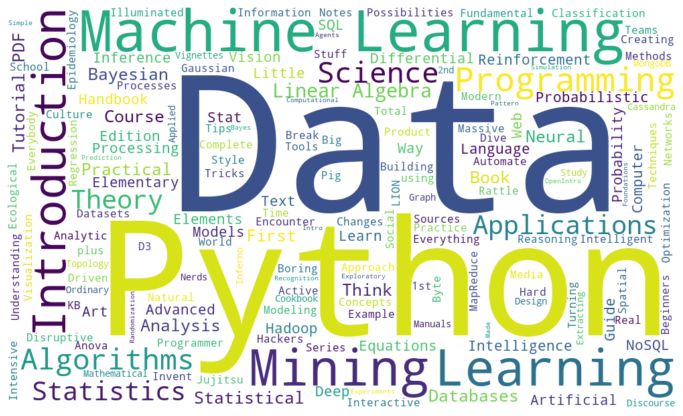

In [26]:
 plot_wordcloud(text, "100ds_titles")

We see that the words Python and Data are predominant, with Machine Learning and Learning coming in close. This makes sense since Python is the most popular language for Data Science.

There are over 988 individual words in the book descriptions.

Let’s see what we get when we plot the word cloud.

This column had “None” imputed, so let’s add it to our list of stop words.

In [27]:
text = " ".join(desc for desc in df_books.description)
print("There are {} words in the combination of all description.".format(len(set(text.split(" ")))))

There are 988 words in the combination of all description.


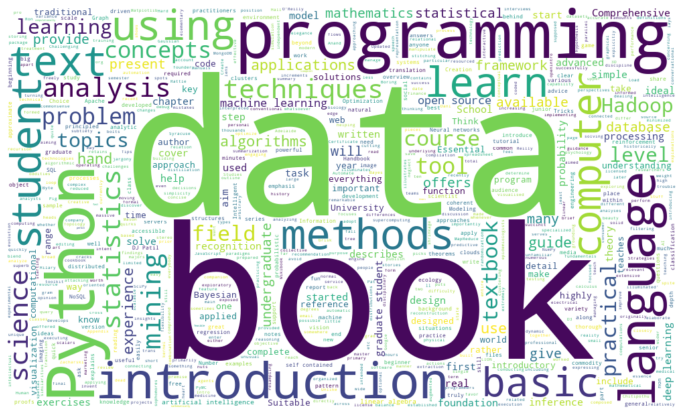

In [28]:
plot_wordcloud(text, "100ds_book_descriptions", ['None'], 1000) # add None to stopwords

We see the word data is highly prevalent, along with the word book and programming. The words Python and introduction is also coming in close. This suggests the books we scraped are mostly introductory programming books related to data and are in the language Python.



##Book category

Our books had many categories; which one was the most common?

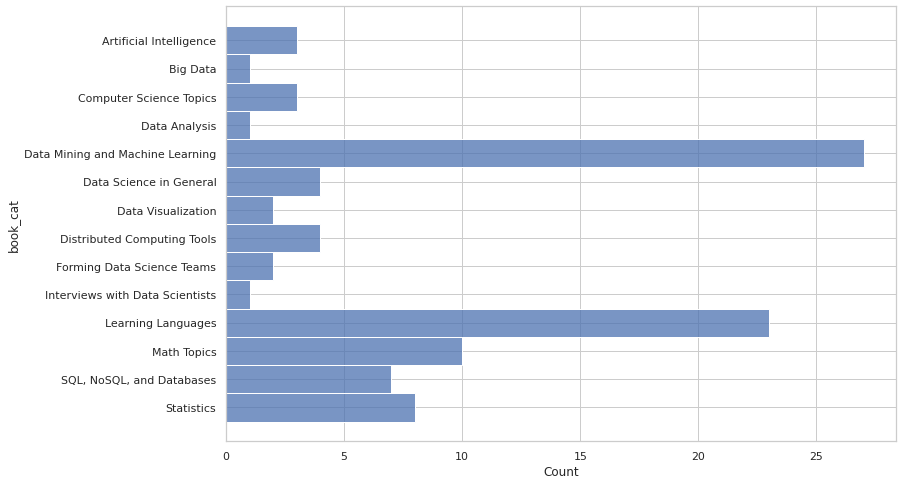

In [29]:
sns.histplot(data=df_books, y='book_cat', discrete=True);

From our plot, we see Data Mining and Machine learning was the most common, with Learning Languages coming in second.

##Book year

We can also plot the year count and find out what year the books are most commonly released.

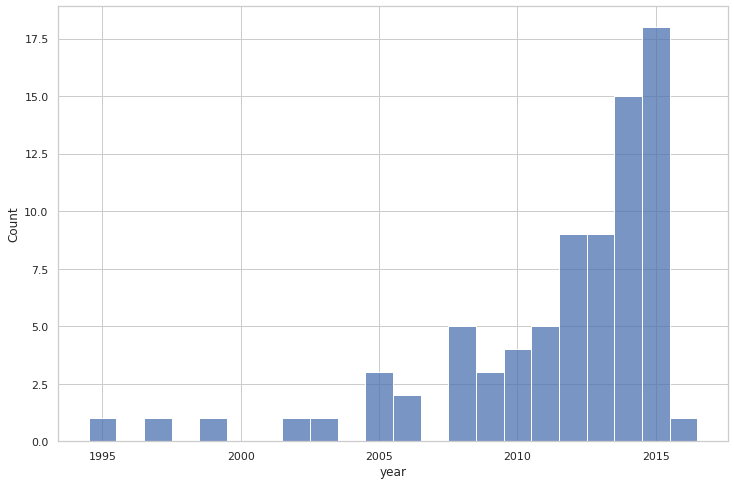

In [30]:
sns.histplot(data=df_books, x='year', discrete=True)

From our plot, we see the year 2015 was the most common in our list of 100 books, exactly 18 books.

##Plot rating and total ratings


Since the rating and total_ratings column had high amounts of missing data, 40 out of 97 rows (almost 50%), we can expect the data to be quite skewed.

In [31]:
df_books[['rating', 'total_ratings']].describe()

,rating,total_ratings
count,96.000000,96.000000
mean,2.363542,125.937500
std,1.983146,332.365772
min,0.000000,0.000000
25%,0.000000,0.000000
50%,3.600000,7.500000
75%,4.100000,95.000000
max,4.600000,1953.000000


Calling describe on the columns, we see 4.6 is the highest rating for the books, and the max amount of rating is 1953.

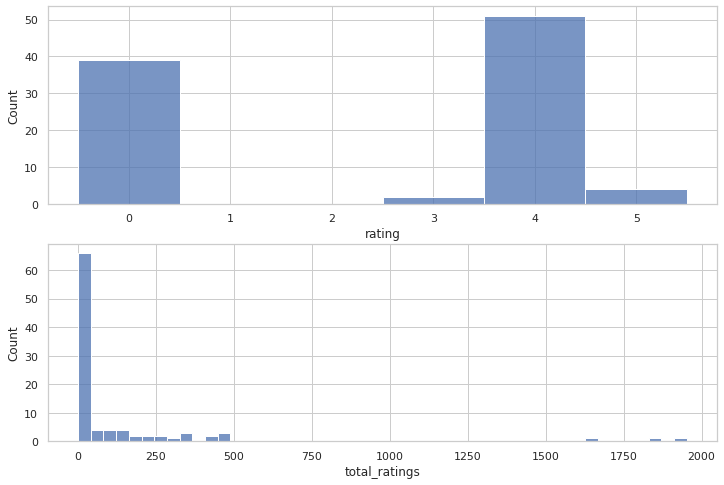

In [32]:
fig, axes = plt.subplots(2)

sns.histplot(data=df_books, x='rating', discrete=True, ax = axes[0])
sns.histplot(data=df_books, x = 'total_ratings', ax = axes[1])

Considering we have quite a lot of missing data and we have very little data, we see that the distribution is pretty skewed.



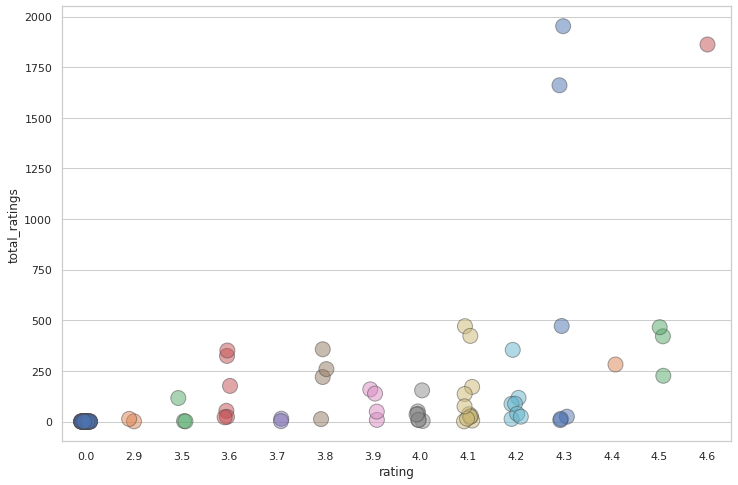

In [33]:
sns.stripplot(x='rating', y = 'total_ratings', data=df_books, 
              linewidth=1, size = 15, alpha=.50, palette = "deep");

For total_ratings, notice how three points are extreme outliers. These three books have a high rating and total number of ratings.

##Which book to read?

If you see this list of 100 books, which one to choose first?  We could select the one with the highes rating

##Which are the three books with high total ratings and ratings from our plot?

Based on the last plot, we saw three data points with total ratings above 1500 and ratings above 4.0 (or 4.2 to be more exact).

In [34]:
df_books[(df_books['total_ratings'] > 1500) & (df_books['rating'] > 4.0)].iloc[:, :6]

,title,book_cat,author,year,rating,total_ratings
50,Automate the Boring Stuff with Python: Practic...,Learning Languages,Al Sweigart,2015,4.3,1953
88,An Introduction to Statistical Learning with A...,Statistics,"Gareth James, Daniela Witten, Trevor Hastie, &...",2013,4.6,1867
95,Pattern Recognition and Machine Learning,Artificial Intelligence,Christopher M. Bishop,2006,4.3,1661


##What are the top 10 books in total ratings?

We can sort our data frame based on columns, so let’s see what the top 10 books are in total ratings.

In [35]:
df_books.sort_values(by=['total_ratings'], ascending=False)[:10].iloc[:, :6]

,title,book_cat,author,year,rating,total_ratings
50,Automate the Boring Stuff with Python: Practic...,Learning Languages,Al Sweigart,2015,4.3,1953
88,An Introduction to Statistical Learning with A...,Statistics,"Gareth James, Daniela Witten, Trevor Hastie, &...",2013,4.6,1867
95,Pattern Recognition and Machine Learning,Artificial Intelligence,Christopher M. Bishop,2006,4.3,1661
59,Python for Everybody,Learning Languages,Dr. Charles R Severance,2016,4.3,472
4,Natural Language Processing with Python,Computer Science Topics,Steven Bird,2009,4.1,471
30,Reinforcement Learning: An Introduction,Data Mining and Machine Learning,Richard S. Sutton & Andrew G. Barto,2012,4.5,466
39,Interactive Data Visualization for the Web,Data Visualization,Scott Murray,2013,4.1,423
18,"Information Theory, Inference, and Learning Al...",Data Mining and Machine Learning,David J.C. MacKay,2005,4.5,421
45,Data Driven: Creating a Data Culture,Forming Data Science Teams,"DJ Patil,‎ Hilary Mason",<NA>,3.8,357
0,"Artificial Intelligence A Modern Approach, 1st...",Artificial Intelligence,Stuart Russell,1995,4.2,354


##What are the top 10 books in terms of total rating and rating?

We can sort them by rating and total_rating

In [36]:
df_books.sort_values(by=['rating', 'total_ratings'], ascending=False)[:10].iloc[:, :6]

,title,book_cat,author,year,rating,total_ratings
88,An Introduction to Statistical Learning with A...,Statistics,"Gareth James, Daniela Witten, Trevor Hastie, &...",2013,4.6,1867
30,Reinforcement Learning: An Introduction,Data Mining and Machine Learning,Richard S. Sutton & Andrew G. Barto,2012,4.5,466
18,"Information Theory, Inference, and Learning Al...",Data Mining and Machine Learning,David J.C. MacKay,2005,4.5,421
48,Advanced R,Learning Languages,Hadley Wickham,2014,4.5,226
92,The Elements of Statistical Learning: Data Min...,Statistics,"Trevor Hastie, Robert Tibshirani, & Jerome Fri...",2008,4.4,283
50,Automate the Boring Stuff with Python: Practic...,Learning Languages,Al Sweigart,2015,4.3,1953
95,Pattern Recognition and Machine Learning,Artificial Intelligence,Christopher M. Bishop,2006,4.3,1661
59,Python for Everybody,Learning Languages,Dr. Charles R Severance,2016,4.3,472
25,Mining of Massive Datasets,Data Mining and Machine Learning,"Jure Leskovec, Anand Rajaraman, & Jeff Ullman",2014,4.3,24
73,Introduction to Probability,Math Topics,Charles M. Grinstead & J. Laurie Snell,1997,4.3,13


We see that some new books popped up on the list. However, some of the books have few ratings. For example, the book Introduction to Probability only has 13 ratings, and it’s hard to say if the book is good or not.

##Can you trust the results?

We have a very small dataset, only 100 books,and only around 40 ratings and total ratingsmissing a lot, our results will be biased. To make sure we make the data-driven decision, we should increase our sample size and impute the missing data with more scraping.

##Interactive data table.

In [37]:
data_table.DataTable(df_books, include_index=False, num_rows_per_page=10)

,title,book_cat,author,year,rating,total_ratings,description,book_link,review_link
0,"Artificial Intelligence A Modern Approach, 1st...",Artificial Intelligence,Stuart Russell,1995,4.2,354,"Comprehensive, up-to-date introduction to the ...",http://www.cin.ufpe.br/~tfl2/artificial-intell...,http://www.amazon.com/gp/product/0136042597/re...
1,The LION Way: Machine Learning plus Intelligen...,Artificial Intelligence,Roberto Battiti & Mauro Brunato,2013,3.5,2,Learning and Intelligent Optimization (LION) i...,http://www.e-booksdirectory.com/details.php?eb...,https://www.amazon.com/The-LION-Way-Intelligen...
2,Disruptive Possibilities: How Big Data Changes...,Big Data,Jeffrey Needham,2013,3.5,116,This book provides an historically-informed ov...,http://www.oreilly.com/data/free/files/disrupt...,http://www.amazon.com/gp/product/B00CLH387W/re...
3,Computer Vision,Computer Science Topics,Richard Szeliski,2010,4.2,117,Challenging real-world applications where visi...,http://szeliski.org/Book/,http://www.amazon.com/gp/product/1848829345/re...
4,Natural Language Processing with Python,Computer Science Topics,Steven Bird,2009,4.1,471,This book offers a highly accessible introduct...,http://www.nltk.org/book_1ed/,http://www.amazon.com/gp/product/0596516495/re...
...,...,...,...,...,...,...,...,...,...
91,OpenIntro Statistics,Statistics,"David M Diez, Christopher D Barr, & Mine Çetin...",2015,4.0,35,"Probability is optional, inference is key, and...",https://www.openintro.org/book/os/,https://www.amazon.com/OpenIntro-Statistics-Th...
92,The Elements of Statistical Learning: Data Min...,Statistics,"Trevor Hastie, Robert Tibshirani, & Jerome Fri...",2008,4.4,283,This book describes the important ideas in a v...,http://statweb.stanford.edu/~tibs/ElemStatLear...,http://www.amazon.com/gp/product/0387848576/re...
93,Think Bayes: Bayesian Statistics Made Simple,Statistics,Allen B. Downey,2012,3.9,49,Think Bayes is an introduction to Bayesian sta...,http://greenteapress.com/thinkbayes/,http://www.amazon.com/gp/product/1449370780/re...
94,Think Stats: Exploratory Data Analysis in Python,Statistics,Allen B. Downey,2014,3.6,351,This concise introduction shows you how to per...,http://greenteapress.com/thinkstats2/thinkstat...,http://www.amazon.com/gp/product/1449307116/re...


In [38]:
df_books.to_csv('100_DS_books.csv', index=False)

We have exported the list to a csv file, now we can iterate over the book_link column and down load the books to our computer.